In [39]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore

# Preprocessing

In [40]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Handle missing values

Let's start by checking if there's any missing data:

In [41]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Seems like we have no missing values!

## Change data types

Let's see the types of the columns and see if any conversions are needed:

In [42]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Seems like we should consider converting "age" and "platelets" to integers.

Let's strart by checking the values of "age" columns and see if we can convert it to integer:

In [43]:
data.age.unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

Seems like only one value in the dataset is an actual float vlue - let's converting this column to integer whould be a good choice:

In [44]:
data.age = data.age.astype("int64")
data.age.dtype
data.age.unique()

array([75, 55, 65, 50, 90, 60, 80, 62, 45, 49, 82, 87, 70, 48, 68, 53, 95,
       58, 94, 85, 69, 72, 51, 57, 42, 41, 67, 79, 59, 44, 63, 86, 66, 43,
       46, 61, 81, 52, 64, 40, 73, 77, 78, 54, 47, 56], dtype=int64)

Lets' look at the "platelets" column:

In [45]:
data.platelets.unique()

array([265000.  , 263358.03, 162000.  , 210000.  , 327000.  , 204000.  ,
       127000.  , 454000.  , 388000.  , 368000.  , 253000.  , 136000.  ,
       276000.  , 427000.  ,  47000.  , 262000.  , 166000.  , 237000.  ,
        87000.  , 297000.  , 289000.  , 149000.  , 196000.  , 284000.  ,
       153000.  , 200000.  , 360000.  , 319000.  , 302000.  , 188000.  ,
       228000.  , 226000.  , 321000.  , 305000.  , 329000.  , 185000.  ,
       218000.  , 194000.  , 310000.  , 271000.  , 451000.  , 140000.  ,
       395000.  , 418000.  , 351000.  , 255000.  , 461000.  , 223000.  ,
       216000.  , 254000.  , 390000.  , 385000.  , 119000.  , 213000.  ,
       274000.  , 244000.  , 497000.  , 374000.  , 122000.  , 243000.  ,
       266000.  , 317000.  , 283000.  , 324000.  , 293000.  , 172000.  ,
       406000.  , 173000.  , 304000.  , 235000.  , 181000.  , 249000.  ,
       219000.  , 318000.  , 221000.  , 298000.  , 286000.  , 621000.  ,
       263000.  , 850000.  , 306000.  , 252000.  , 

These values seem to be very large! probably because they are in platelets/mL measure, converting it to kiloplatelets/mL would make the values more compact. Finally, we will converty it to int

In [46]:
data.platelets = (data.platelets / 1000).astype("int64")
data.platelets.unique()

array([265, 263, 162, 210, 327, 204, 127, 454, 388, 368, 253, 136, 276,
       427,  47, 262, 166, 237,  87, 297, 289, 149, 196, 284, 153, 200,
       360, 319, 302, 188, 228, 226, 321, 305, 329, 185, 218, 194, 310,
       271, 451, 140, 395, 418, 351, 255, 461, 223, 216, 254, 390, 385,
       119, 213, 274, 244, 497, 374, 122, 243, 266, 317, 283, 324, 293,
       172, 406, 173, 304, 235, 181, 249, 219, 318, 221, 298, 286, 621,
       850, 306, 252, 328, 164, 507, 203, 217, 300, 267, 227, 250, 295,
       231, 211, 348, 229, 338, 242, 225, 184, 277, 362, 174, 448,  75,
       334, 192, 220,  70, 270, 325, 176, 189, 281, 337, 105, 132, 279,
       303, 224, 389, 365, 201, 275, 350, 309, 260, 160, 126, 259,  73,
       377, 212, 186, 268, 147, 481, 290, 358, 151, 371, 130, 504, 141,
        62, 330, 248, 257, 533, 264, 282, 314, 246, 301, 404, 236, 294,
       233, 308, 198, 208, 133, 222, 215, 150, 422,  25, 232, 241,  51,
       336, 543, 382, 179, 155, 742], dtype=int64)

In [47]:
data.time.unique()

array([  4,   6,   7,   8,  10,  11,  12,  13,  14,  15,  16,  20,  22,
        23,  24,  26,  27,  28,  29,  30,  31,  32,  33,  35,  38,  40,
        41,  42,  43,  44,  45,  50,  54,  55,  59,  60,  61,  63,  64,
        65,  66,  67,  68,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  82,  83,  85,  86,  87,  88,  90,  91,  94,  95,  96,  97,
       100, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117,
       118, 119, 120, 121, 123, 126, 129, 130, 134, 135, 140, 145, 146,
       147, 148, 150, 154, 162, 170, 171, 172, 174, 175, 180, 185, 186,
       187, 188, 192, 193, 194, 195, 196, 197, 198, 200, 201, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 220, 230, 231,
       233, 235, 237, 240, 241, 244, 245, 246, 247, 250, 256, 257, 258,
       270, 271, 278, 280, 285], dtype=int64)

Let's change the date column which indicates the number of days between medical inspection for the patients. Let's rescale this data to weeks (starting from once a month 

In [48]:
data.time = np.ceil(data.time / 7).astype("int64")
data.time.unique()
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265,1.9,130,1,0,1,1
1,55,0,7861,0,38,0,263,1.1,136,1,0,1,1
2,65,0,146,0,20,0,162,1.3,129,1,1,1,1
3,50,1,111,0,20,0,210,1.9,137,1,0,1,1
4,65,1,160,1,20,0,327,2.7,116,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155,1.1,143,1,1,39,0
295,55,0,1820,0,38,0,270,1.2,139,0,0,39,0
296,45,0,2060,1,60,0,742,0.8,138,0,0,40,0
297,45,0,2413,0,38,0,140,1.4,140,1,1,40,0


## Remove columns

Finally, let's check the binrary columns are actually binary (anemia, diabetes, high blood plessure, sex, smoking)

In [49]:
data.anaemia = data.anaemia.astype("bool")
data.diabetes = data.diabetes.astype("bool")
data.high_blood_pressure = data.high_blood_pressure.astype("bool")
data.sex = data.sex.astype("bool")
data.smoking = data.smoking.astype("bool")
data.DEATH_EVENT = data.DEATH_EVENT.astype("bool")
data.dtypes

age                           int64
anaemia                        bool
creatinine_phosphokinase      int64
diabetes                       bool
ejection_fraction             int64
high_blood_pressure            bool
platelets                     int64
serum_creatinine            float64
serum_sodium                  int64
sex                            bool
smoking                        bool
time                          int64
DEATH_EVENT                    bool
dtype: object

Let's try removing columns that have low correlation to the DEATH_EVNET value:

In [50]:
data.corrwith(data["DEATH_EVENT"]).abs().sort_values()

diabetes                    0.001943
sex                         0.004316
smoking                     0.012623
platelets                   0.049188
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
serum_sodium                0.195204
age                         0.253581
ejection_fraction           0.268603
serum_creatinine            0.294278
time                        0.526917
DEATH_EVENT                 1.000000
dtype: float64

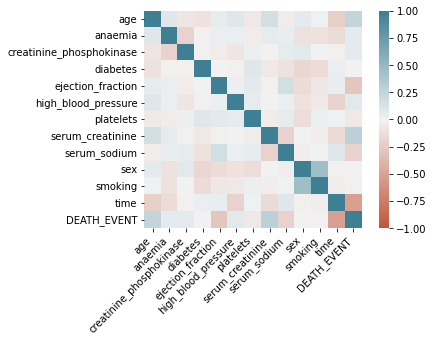

In [51]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Seems like "diabetes", "sex", and "smoking" have low correlation to the DEATH_EVENT value. Let's drop them:

In [52]:
data = data.drop(columns=["sex", "diabetes", "smoking"])

In [53]:
data.head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75,False,582,20,True,265,1.9,130,1,True
1,55,False,7861,38,False,263,1.1,136,1,True
2,65,False,146,20,False,162,1.3,129,1,True
3,50,True,111,20,False,210,1.9,137,1,True
4,65,True,160,20,False,327,2.7,116,2,True


## Remove outliers

In [54]:
data.describe(include="all")

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
count,299.000000,299,299.000000,299.000000,299,299.000000,299.00000,299.000000,299.000000,299
unique,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,2
top,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False
freq,NaN,170,NaN,NaN,194,NaN,NaN,NaN,NaN,203
mean,60.829431,NaN,581.839465,38.083612,NaN,263.327759,1.39388,136.625418,19.026756,NaN
std,11.894997,NaN,970.287881,11.834841,NaN,97.805105,1.03451,4.412477,11.038035,NaN
min,40.000000,NaN,23.000000,14.000000,NaN,25.000000,0.50000,113.000000,1.000000,NaN
25%,51.000000,NaN,116.500000,30.000000,NaN,212.500000,0.90000,134.000000,11.000000,NaN
50%,60.000000,NaN,250.000000,38.000000,NaN,262.000000,1.10000,137.000000,17.000000,NaN
75%,70.000000,NaN,582.000000,45.000000,NaN,303.500000,1.40000,140.000000,29.500000,NaN


### Ejection Fraction

Let's start with the "ejection_fraction" column:

<AxesSubplot:xlabel='ejection_fraction'>

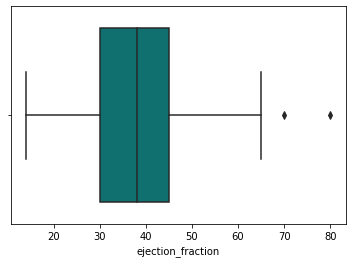

In [55]:
sns.boxplot(x = data.ejection_fraction, color = 'teal')

Seems like we have two outliers: 70, 80. Let's remove them:

<AxesSubplot:xlabel='ejection_fraction'>

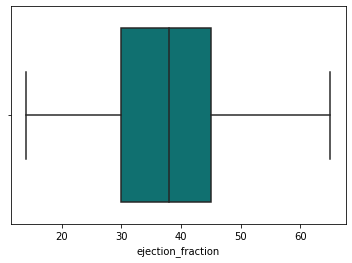

In [56]:
data = data.drop(data[data.ejection_fraction >= 70].index)
sns.boxplot(x = data.ejection_fraction, color = 'teal')

### Platelets

<AxesSubplot:xlabel='platelets'>

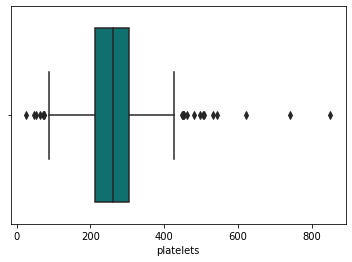

In [57]:
sns.boxplot(x = data.platelets, color = 'teal')

Seems line we have lots of outliers: values below 100 kiloplatelets/mL or higher than ~400 kiloplatelets/mL. Normal platelets levels are 150-450 kiloplatelets/mL, while a value lower than 10 is considered extremely low and above 450 is considered very high. Seems like removing that value higher than 650 would be a good choice (two outliers).

In [58]:
data[data.platelets > 650]

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
109,45,False,292,35,False,850,1.3,142,13,False
296,45,False,2060,60,False,742,0.8,138,40,False


<AxesSubplot:xlabel='platelets'>

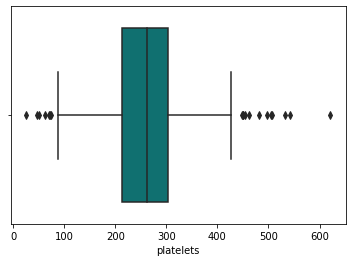

In [59]:
data = data.drop(data[data.platelets >= 650].index)
sns.boxplot(x = data.platelets, color = 'teal')

### Serum Sodium

<AxesSubplot:xlabel='serum_sodium'>

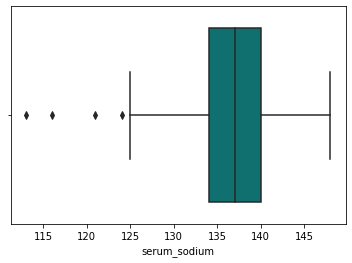

In [60]:
sns.boxplot(x = data.serum_sodium, color = 'teal')

Normal values of serum sodium are 135-145 mEq/L, while values lower than 125 indicates severe Hyponatremia. Values under 120 would probably be outliers. Let's remove them:

In [61]:
data[data.serum_sodium < 120]

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
4,65,True,160,20,False,327,2.7,116,2,True
199,60,False,1211,35,False,263,1.8,113,27,False


<AxesSubplot:xlabel='serum_sodium'>

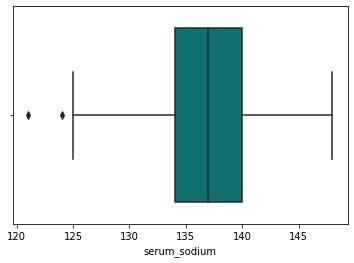

In [62]:
data = data.drop(data[data.serum_sodium < 120].index)
sns.boxplot(x = data.serum_sodium, color = 'teal')

### Serum Creatinine

<AxesSubplot:xlabel='serum_creatinine'>

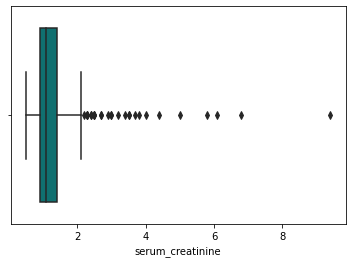

In [63]:
sns.boxplot(x = data.serum_creatinine, color = 'teal')

Values higher than 5 indicate severe kidney damage, so logically seems that serum creatinine levels higher than 8 are extremely high values (possibly outliers). Looking at the data I decided to leave them, because patients having values higher than 8 died from heart failure and it is possible than the high value is caused by additional medical disorder that lead to their death. Removing these outliers can lead to loss of valuable data!

In [64]:
data[data.serum_creatinine > 8]

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
9,80,True,123,35,True,388,9.4,133,2,True


### Creatinine Phosphokinase

<AxesSubplot:xlabel='creatinine_phosphokinase'>

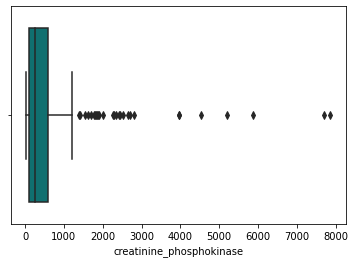

In [65]:
sns.boxplot(x = data.creatinine_phosphokinase, color = 'teal')

Seems like creatinine phosphokinase are petty high levels and might be outliers, but looking at the data again these extreme levels might have actually led to the death event. So I decided to leave the outliers.

In [66]:
data[data.creatinine_phosphokinase > 7000]

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
1,55,False,7861,38,False,263,1.1,136,1,True
60,45,False,7702,25,True,390,1.0,139,9,True


## Check imbalanced in data

Text(0.5, 1.0, 'Death event distribution')

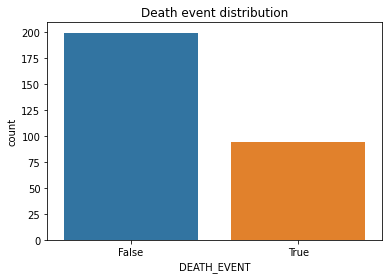

In [67]:
sns.countplot(data.DEATH_EVENT).set_title("Death event distribution")

# Data visualization

TO DO

# Prediction

I will use the following models for classification: logistic regression, decision tree, random forest, XBClassifier. For choosing the best parameters I will use RandomSearchCV.

## Logistic regression

Let's use logistic regression to try and predict the survival. For that we will use KFold:

In [68]:
from sklearn.model_selection import RepeatedKFold

data.reset_index(drop=True, inplace=True)
features = [x for x in data.columns if x!='DEATH_EVENT']
X = pd.get_dummies(data[features])
y = data.DEATH_EVENT

rkf = RepeatedKFold(n_splits=5, random_state=12345)
train_index, test_index = list(rkf.split(X, y))[0]
train, test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y[train_index], y[test_index]

              precision    recall  f1-score   support

       False       0.84      0.86      0.85        37
        True       0.76      0.73      0.74        22

    accuracy                           0.81        59
   macro avg       0.80      0.80      0.80        59
weighted avg       0.81      0.81      0.81        59

0.8338390379278446
{'C': 0.0018690566937453142, 'penalty': 'l2', 'solver': 'newton-cg'}


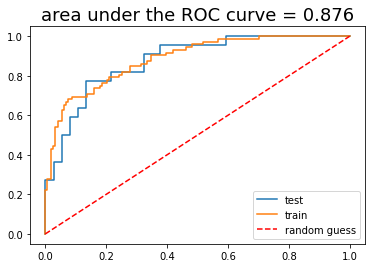

In [69]:
from scipy.stats import loguniform
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, confusion_matrix

def find_best_threshold(thresholds, fpr, tpr):
    """
    find the best threshold from the roc curve. by finding the threshold for the point which is closest to (fpr=0,tpr=1)
    """
    fpr_tpr = pd.DataFrame({'thresholds': thresholds, 'fpr': fpr, 'tpr': tpr})
    fpr_tpr['dist'] = (fpr_tpr['fpr'])**2 + (fpr_tpr['tpr']-1)**2
    return fpr_tpr.loc[fpr_tpr.dist.argmin(), 'thresholds']


def get_model_results(model, train, test, y_train, y_test):
    probabilities = model.predict_proba(test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    threshold = find_best_threshold(thresholds, fpr, tpr)
    predictions = probabilities>threshold
    plt.figure()
    plt.plot(fpr, tpr, label='test')
    roc_auc = roc_auc_score(y_test, probabilities)
    probabilities = model.predict_proba(train)[:,1]
    fpr, tpr, thresholds = roc_curve(y_train, probabilities)
    plt.plot(fpr, tpr, label='train')
    plt.plot([0, 1], [0, 1], 'r--', label='random guess')
    plt.title("area under the ROC curve = {:.3f}".format(roc_auc), fontsize=18);
    print(classification_report(y_test, predictions))
    plt.legend()
    

space = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'C': loguniform(1e-5, 100),
}

search = RandomizedSearchCV(LogisticRegression(), space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=rkf, random_state=1)
result  = search.fit(train, y_train)
get_model_results(search, train, test, y_train, y_test)
print(result.best_score_)
print(result.best_params_)

## Decision Tree

              precision    recall  f1-score   support

       False       0.83      0.95      0.89        37
        True       0.88      0.68      0.77        22

    accuracy                           0.85        59
   macro avg       0.86      0.81      0.83        59
weighted avg       0.85      0.85      0.84        59

0.8162719703977799
{'splitter': 'best', 'min_samples_split': 20, 'max_depth': 2}


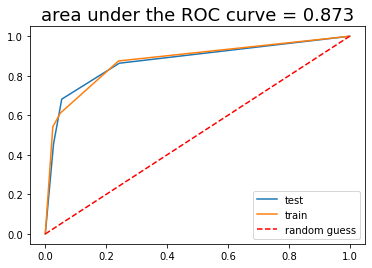

In [70]:
from sklearn.tree import DecisionTreeClassifier

space = {
    'max_depth': [2, 3, 5],
    'splitter': ['random', 'best'],
    'min_samples_split': [10, 20, 30]
}

search = RandomizedSearchCV(DecisionTreeClassifier() , space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=rkf, random_state=1)
result = search.fit(train, y_train)
get_model_results(search, train, test, y_train, y_test)
print(result.best_score_)
print(result.best_params_)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

space = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [5, 10, 20],
    'n_estimators': [100, 150, 200]
}

search = RandomizedSearchCV(RandomForestClassifier(), space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=rkf, random_state=1)
search.fit(train, y_train)
get_model_results(search, train, test, y_train, y_test)
print(result.best_score_)
print(result.best_params_)

## XGBClassifier

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=3)
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)